## Winter of Code 7.0: Natural Language Processing (NLP)

### Fake Review Detection 

### import necessary  libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [2]:
df=pd.read_csv("fakeReviewData.csv")

In [3]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...


In [4]:
df.shape

(40432, 4)

In [5]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  40432 non-null  object
 1   rating    40432 non-null  int64 
 2   label     40432 non-null  object
 3   text_     40432 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [7]:
df['category'].unique()

array(['Home_and_Kitchen_5', 'Sports_and_Outdoors_5', 'Electronics_5',
       'Movies_and_TV_5', 'Tools_and_Home_Improvement_5',
       'Pet_Supplies_5', 'Kindle_Store_5', 'Books_5', 'Toys_and_Games_5',
       'Clothing_Shoes_and_Jewelry_5'], dtype=object)

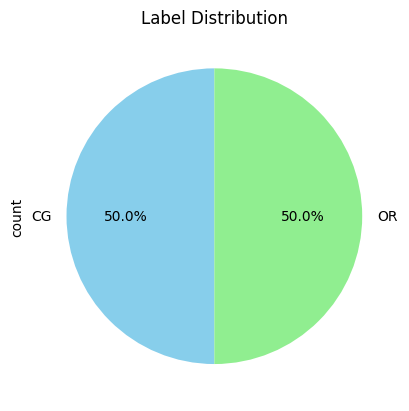

In [8]:
colors = ['skyblue', 'lightgreen']  
df['label'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors[:df['label'].nunique()]
)
plt.title('Label Distribution')
plt.show()

## Most Frequent Words in Fake Reviews

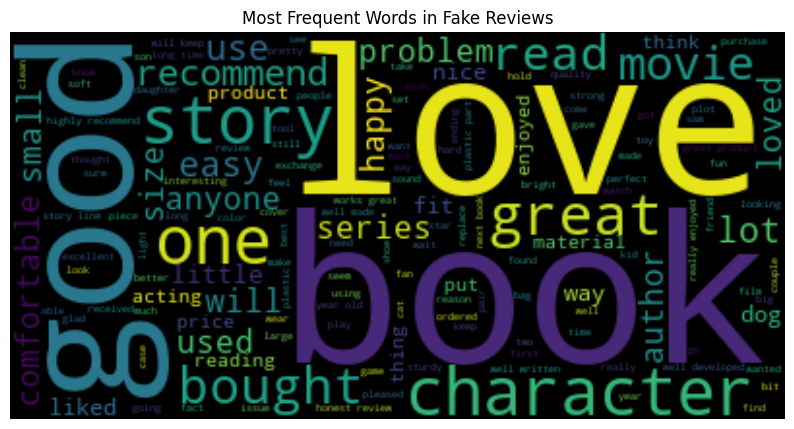

In [9]:
from wordcloud import WordCloud
fake_reviews = " ".join(df[df['label'] == 'CG']['text_'])
wordcloud = WordCloud().generate(fake_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Fake Reviews')
plt.show()

### The visualization of most frequent words in fake reviews is helpful because it can provide valuable insights into the nature of fake reviews

#  Rating distribution 

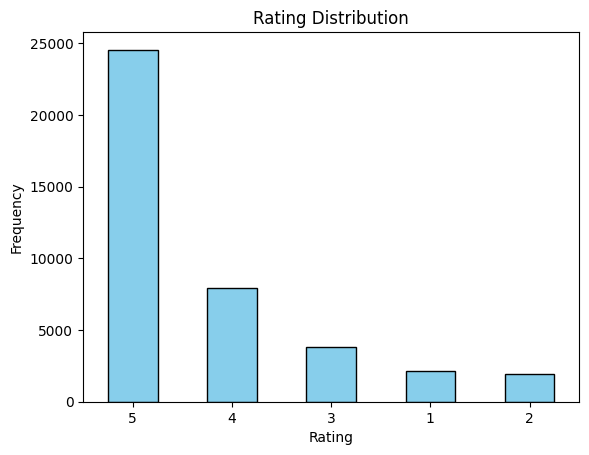

In [10]:
df['rating'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')
plt.xticks(rotation=0)
plt.show()

# Rating Distribution for just Fake Reviews

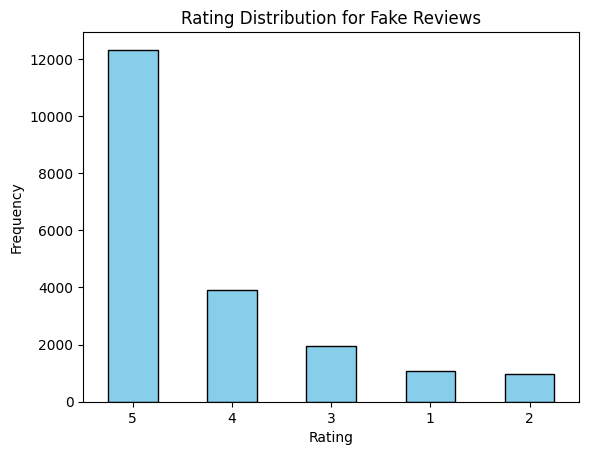

In [11]:
df[df['label'] == 'CG']['rating'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution for Fake Reviews')
plt.xticks(rotation=0)
plt.show()

## why fake Reviewer rating distribution is important 
- Identifying Rating Patterns in Fake Reviews
- Understanding Reviewer Behavior

In [12]:
# Add a new column to store the length of each review 
df['review_length'] = df['text_'].apply(len)

In [13]:
df.head()

,category,rating,label,text_,review_length
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor...",75
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I...",80
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...,67
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i...",81
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...,85


#  Preprocessing

##  1.Data Cleaning

In [14]:
# Check missing values
df.isnull().sum()

category         0
rating           0
label            0
text_            0
review_length    0
dtype: int64

### No any missing values

###  Removing duplicates and irrelevant data

In [15]:
# Drop the 'category' column 
df = df.drop(columns=['category'])

In [16]:
# Checking for duplicates
dub=df.duplicated().sum() 
print(dub)

12


In [17]:
# Removing duplicate rows
df= df.drop_duplicates()

In [18]:
# Remove the data where the text(Review) has fewer than 3 words
df = df[df['text_'].apply(lambda x: len(x.split()) >= 3)]

In [19]:
df.shape

(40417, 4)

## 2.Text Normalization

In [20]:
import re
import contractions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [21]:
# Download necessary NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to C:\Users\Milan
[nltk_data]     Nagvadiya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Milan
[nltk_data]     Nagvadiya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Milan
[nltk_data]     Nagvadiya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
# Simplified data cleaning function
def data_cleaning(text):
    text = text.lower()  # Convert to lowercase
    text = contractions.fix(text)  # Expand contractions
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stop_words or word == "not"]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize tokens
    return " ".join(tokens)  # Join tokens back into a string


In [23]:
df['cleaned_text'] = df['text_'].apply(data_cleaning)

# Word2Vec Model and Sentence Vectorization

In [28]:
from gensim.models import Word2Vec

In [30]:
tl_reviews = df['cleaned_text'].tolist()
word2vec_model = Word2Vec(sentences=tl_reviews, vector_size=300, window=5, min_count=1, workers=4)


def get_sentence_vector(sentence, model):
    word_vectors = [model.wv[word] for word in sentence if word in model.wv]
    
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)

    return np.mean(word_vectors, axis=0)

sentence_vectors = np.array([get_sentence_vector(review, word2vec_model) for review in tl_reviews])

vector_columns = [f'vector_{i}' for i in range(300)]
vector_df = pd.DataFrame(sentence_vectors, columns=vector_columns)

df = pd.concat([df.reset_index(drop=True), vector_df], axis=1)
df

,rating,label,text_,review_length,cleaned_text,vector_0,vector_1,vector_2,vector_3,vector_4,...,vector_290,vector_291,vector_292,vector_293,vector_294,vector_295,vector_296,vector_297,vector_298,vector_299
0,5,CG,"Love this! Well made, sturdy, and very comfor...",75,love well made sturdy comfortable love itvery ...,0.009552,0.055578,-0.074036,-0.004832,-0.087739,...,0.135590,0.035983,0.118541,0.009863,-0.006641,0.030139,-0.006002,-0.066576,0.032783,-0.117144
1,5,CG,"love it, a great upgrade from the original. I...",80,love great upgrade original mine couple year,0.024314,0.011938,-0.050561,-0.000509,-0.047107,...,0.065640,0.011398,0.079855,-0.008035,-0.018000,-0.024986,-0.004174,-0.053297,0.013269,-0.065177
2,5,CG,This pillow saved my back. I love the look and...,67,pillow saved back love look feel pillow,0.037266,0.021903,-0.104903,-0.024621,-0.121138,...,0.136369,0.025341,0.071049,-0.008753,0.033459,0.084169,0.008969,-0.039396,0.084630,-0.111436
3,1,CG,"Missing information on how to use it, but it i...",81,missing information use great product price,0.038293,-0.021084,-0.034790,0.013776,-0.031484,...,0.064170,0.037570,0.096194,-0.001511,0.026777,-0.060727,-0.007324,-0.053665,0.042030,-0.102379
4,5,CG,Very nice set. Good quality. We have had the s...,85,nice set good quality set two month not,-0.018134,0.016582,0.006793,0.012251,-0.033542,...,0.127616,0.023219,0.063599,-0.049727,0.007967,-0.039801,-0.004324,-0.021565,0.060416,-0.048606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40412,4,OR,I had read some reviews saying that this bra r...,1694,read review saying bra ran small ordered two b...,0.017748,0.004021,-0.036317,0.019493,-0.046378,...,0.099794,0.024294,0.069069,-0.017076,0.005866,-0.009540,-0.003452,-0.033704,0.029327,-0.071097
40413,5,CG,I wasn't sure exactly what it would be. It is ...,1304,not sure exactly would little large small size...,0.031920,0.013663,-0.048539,0.024120,-0.049962,...,0.081517,0.013344,0.058813,-0.007409,-0.007989,-0.015958,-0.006081,-0.034385,0.011984,-0.068128
40414,2,OR,"You can wear the hood by itself, wear it with ...",1987,wear hood wear hood wear jacket without hood 3...,0.016334,0.022428,-0.037476,0.021337,-0.043700,...,0.106517,0.025341,0.071182,-0.025164,-0.008391,-0.017505,0.003408,-0.040549,0.034529,-0.076795
40415,1,CG,I liked nothing about this dress. The only rea...,1301,liked nothing dress reason gave 4 star ordered...,0.031930,0.010077,-0.044249,0.033578,-0.056147,...,0.068175,0.004211,0.053424,-0.002172,-0.030394,-0.016384,-0.009781,-0.031628,-0.005496,-0.062291


## Lable encoding 

In [31]:
df['label'] = df['label'].map({'CG': 1, 'OR': 0})

In [32]:
df.head()

,rating,label,text_,review_length,cleaned_text,vector_0,vector_1,vector_2,vector_3,vector_4,...,vector_290,vector_291,vector_292,vector_293,vector_294,vector_295,vector_296,vector_297,vector_298,vector_299
0,5,1,"Love this! Well made, sturdy, and very comfor...",75,love well made sturdy comfortable love itvery ...,0.009552,0.055578,-0.074036,-0.004832,-0.087739,...,0.135590,0.035983,0.118541,0.009863,-0.006641,0.030139,-0.006002,-0.066576,0.032783,-0.117144
1,5,1,"love it, a great upgrade from the original. I...",80,love great upgrade original mine couple year,0.024314,0.011938,-0.050561,-0.000509,-0.047107,...,0.065640,0.011398,0.079855,-0.008035,-0.018000,-0.024986,-0.004174,-0.053297,0.013269,-0.065177
2,5,1,This pillow saved my back. I love the look and...,67,pillow saved back love look feel pillow,0.037266,0.021903,-0.104903,-0.024621,-0.121138,...,0.136369,0.025341,0.071049,-0.008753,0.033459,0.084169,0.008969,-0.039396,0.084630,-0.111436
3,1,1,"Missing information on how to use it, but it i...",81,missing information use great product price,0.038293,-0.021084,-0.034790,0.013776,-0.031484,...,0.064170,0.037570,0.096194,-0.001511,0.026777,-0.060727,-0.007324,-0.053665,0.042030,-0.102379
4,5,1,Very nice set. Good quality. We have had the s...,85,nice set good quality set two month not,-0.018134,0.016582,0.006793,0.012251,-0.033542,...,0.127616,0.023219,0.063599,-0.049727,0.007967,-0.039801,-0.004324,-0.021565,0.060416,-0.048606


In [33]:
# Save the DataFrame 
df.to_csv('preprocessed datase.csv', index=False)